In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import tensor
import swyft
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 15

from forward import *

In [2]:
low_list = [65.0]
high_list = [80.0]
low = np.array(low_list)
high = np.array(high_list)
prior = swyft.get_uniform_prior(low, high)

In [3]:
observation_o = {'x': np.array([1.0])}

n_observation_features = observation_o[observation_key].shape[0]
observation_shapes = {key: value.shape for key, value in observation_o.items()}

simulator = swyft.Simulator(
    forward,
    1,
    sim_shapes=observation_shapes
)

store = swyft.Store.memory_store(simulator)

Creating new store.


In [4]:
subdir = 'o4n7'

In [5]:
dtl = torch.load('data archive/' + subdir + '.dataset.pt')

In [6]:
def find_min(dataset):
    """
    Finds the minimum value of S in a dataset.
    """
    val = []
    for i in range(len(dataset)):
        val += [dataset[i][0]['x'].numpy()]
    return min(val)

In [7]:
mdtl = find_min(dtl)[0]

In [8]:
H0_0 = []
for dat in dtl:
    if dat[0]['x'].numpy() == mdtl:
        H0_0 += [dat[2].numpy()]
#     if np.isnan(dat[0]['x'].numpy()):
#         H0_0 += [dat[2].numpy()]

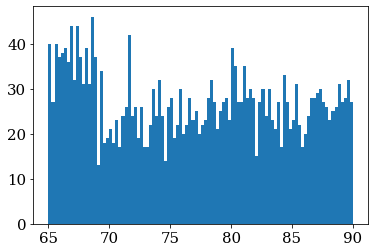

In [10]:
bins = plt.hist(np.asarray(H0_0), 100)
plt.show()

In [25]:
def zero_percentage(dataset, n):
    mdtl = find_min(dataset)[0]
    H0_zeros = []
    H0 = []
    for dat in dataset:
        if dat[0]['x'].numpy() == mdtl:
            H0_zeros += [dat[2].numpy()[0]]
        if not np.isnan(dat[0]['x'].numpy()):
            H0 += [dat[2].numpy()[0]]
    bins = plt.hist(H0, n)
    bins0 = plt.hist(H0_zeros, n)
    print(len(bins[1]))
    plt.clf()
    return bins0[0]/bins[0]

In [26]:
percent = zero_percentage(dtl, 100)

101


<Figure size 432x288 with 0 Axes>

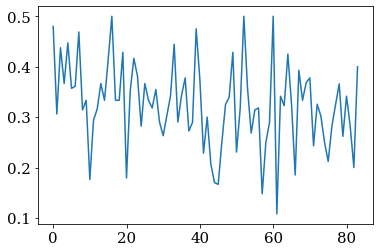

In [27]:
plt.plot(1-percent[16:])
plt.show()